In [8]:
# Importing necessary libraries
import numpy as np
import matplotlib.pyplot as plt
from numpy import linalg as LA
import cv2


In [9]:
faces=np.load("/content/olivetti_faces.npy")

(-0.5, 63.5, 63.5, -0.5)

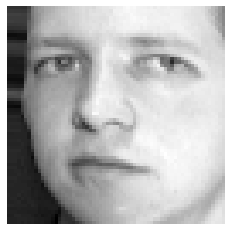

In [23]:
plt.imshow(faces[3], cmap='gray')
plt.axis('off')


(-0.5, 63.5, 63.5, -0.5)

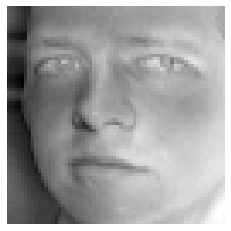

In [25]:
avgFace = np.average(faces, axis=0)
X = faces
X = X.reshape((X.shape[0], X.shape[1]**2)) #flattening the image 
X = X - np.average(X, axis=0) #making it zero centered
#printing a sample image to show the effect of zero centering
plt.imshow(X[3].reshape(64,64), cmap='gray')
plt.axis('off')

In [31]:
X_meaned = X - np.mean(X , axis = 0)
print (X_meaned)

print(X.shape)
print (X_meaned.shape)

cov_mat = np.cov(X_meaned , rowvar = False)   # rowvar = False >> work with X_meaned as transposed

print (cov_mat.shape)
print (cov_mat)
eigen_values , eigen_vectors = np.linalg.eigh(cov_mat)

print (eigen_vectors.shape)
print (eigen_values)

#sort the eigenvalues in descending order
sorted_index = np.argsort(eigen_values)[::-1]
print (sorted_index)
sorted_eigenvalue = eigen_values[sorted_index]
#similarly sort the eigenvectors 
sorted_eigenvectors = eigen_vectors[:,sorted_index]
n_components = 50 #you can select any number of components.
eigenvector_subset = sorted_eigenvectors[:,0:n_components]
print (eigenvector_subset)
X_reduced = np.dot(eigenvector_subset.transpose(),X_meaned.transpose()).transpose()

[[-0.09021693 -0.06646696 -0.05892565 ... -0.16852275 -0.15248966
  -0.15342975]
 [ 0.05441117  0.03683883  0.03611569 ... -0.16852275 -0.16075413
  -0.15756199]
 [-0.08195248 -0.03340909  0.01545454 ... -0.18091944 -0.16488636
  -0.15756199]
 ...
 [ 0.0998657   0.09882233  0.13115703 ... -0.14372936 -0.16488636
  -0.12037191]
 [-0.18525827 -0.21522728 -0.25727275 ...  0.25296485  0.27726236
   0.2928512 ]
 [ 0.11639461  0.02857438 -0.19528927 ...  0.03808883  0.0417252
   0.07384297]]
(400, 4096)
(400, 4096)
(4096, 4096)
[[ 0.0326506   0.03229796  0.02867434 ... -0.0062897  -0.00601135
  -0.00467442]
 [ 0.03229796  0.03591166  0.03411555 ... -0.0089469  -0.00847119
  -0.0067598 ]
 [ 0.02867434  0.03411555  0.03792458 ... -0.01218907 -0.01133785
  -0.00948972]
 ...
 [-0.0062897  -0.0089469  -0.01218907 ...  0.03528458  0.03143893
   0.02803686]
 [-0.00601135 -0.00847119 -0.01133785 ...  0.03143893  0.03371498
   0.03130744]
 [-0.00467442 -0.0067598  -0.00948972 ...  0.02803686  0.03130

image compression


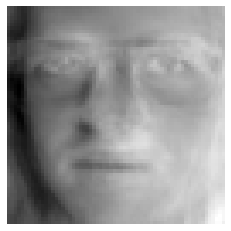

In [32]:
temp= np.matmul(eigenvector_subset,X_reduced[3])
temp.shape
temp=temp.real
plt.imshow(temp.reshape(64,64) , cmap= 'gray')

plt.axis('off')
print("image compression")

In [17]:
print(X_reduced.shape)

(400, 2)
